<a href="https://colab.research.google.com/github/as3fn/Coursera_Capstone/blob/master/IBM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Istanbul Helps Cairo  Find a New Go Kart Location**

Cairo is a big city that is very rich in terms of population density, infrastructure, historical and cultural sites and number of universities. Such characteristics of a city makes it attractive for investors, but due to the age of the city, almost all business ideas and projects can be found around the city, which makes the odds of having an edge very low. Indeed the odds may be low, only if we are talking about conventional business ideas. Egypt is a developing country, and most of the conventional business ideas around the world are quite new for Egypt, which opens the door to more ideas, that may not be new to the world, but new for Egypt.

The problem with these projects is that they need data and effective market research, which Egypt lacks at the moment, but the situation is improving nevertheless. 

One of these ideas is a Go Kart track in Cairo, it's nothing new to the city, but it's not explored as there are 3-4 tracks for the whole city! My job is to choose a location/s for a new track in Cairo based on the venues around the  location. I will need to find a city that's similar to Cairo with already established Go Kart tracks, and try to use the data from this city and apply it to Cairo. I chose Istanbul because it's very similar to Cairo both in density and infrastructure with a good number of tracks +25.

## **Data Preparation**

In this section we go through preparing the data that will be used in the project.



### **Cairo Data**

First we start by loading the Cairo's Neighborhoods data file that was prepared befrom hand from the following link. 

*Note: To see the process of downloading and cleaning the data of Cairo's neighborhoods please check this notebook. 

In [0]:
FILEID='1fUvg4o8GzPTeeIX1MS2FXvBu8vnspVSS'
FILENAME='cairo.csv'
link='https://docs.google.com/uc?export=download&id='+FILEID

In [2]:

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fUvg4o8GzPTeeIX1MS2FXvBu8vnspVSS' -O 'cairo.csv'


--2020-01-24 12:10:50--  https://docs.google.com/uc?export=download&id=1fUvg4o8GzPTeeIX1MS2FXvBu8vnspVSS
Resolving docs.google.com (docs.google.com)... 173.194.218.100, 173.194.218.102, 173.194.218.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aro99eqchjgfmvc6h8vm9i8a7o8sn5qe/1579867200000/04272551345253394129/*/1fUvg4o8GzPTeeIX1MS2FXvBu8vnspVSS?e=download [following]
--2020-01-24 12:10:51--  https://doc-0o-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aro99eqchjgfmvc6h8vm9i8a7o8sn5qe/1579867200000/04272551345253394129/*/1fUvg4o8GzPTeeIX1MS2FXvBu8vnspVSS?e=download
Resolving doc-0o-0c-docs.googleusercontent.com (doc-0o-0c-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-0o-0c-docs.googleusercontent.com (doc-0o

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests


Here we can see the final result, the city in this file is consisting of 53 nigbhorhoods, each with the corospoding latitude and longitude.

In [4]:
cairo=pd.read_csv('/content/cairo.csv')
cairo.head()

,Neighborhood,lat,long
0,Ad-Duqi,30.041422,31.210375
1,Al-'Ajuzah,30.051100,31.212600
2,Al-'Umraniyah,29.993105,31.183427
3,Al-Ahram,29.977300,31.132500
4,Al-Badrashayn,29.817743,31.251240


Next we use the Foursquare API to find the venue information of all the nighborhoods in a radius of 1.5 km.

In [0]:

CLIENT_ID = '***' 
CLIENT_SECRET = '***' 
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)




Finding the venues around 600 m from the nighborhood

In [0]:
cairo_venues = getNearbyVenues(names=cairo['Neighborhood'],
                                   latitudes=cairo['lat'],
                                   longitudes=cairo['long'],
                               radius=1000
                                  )

In [8]:
cairo_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ad-Duqi,30.041422,31.210375,Bab Al Yemen (باب اليمن),30.040153,31.211254,Yemeni Restaurant
1,Ad-Duqi,30.041422,31.210375,Vibe Studio,30.040646,31.208809,Recording Studio
2,Ad-Duqi,30.041422,31.210375,Shaheen Coffee Stores (بُن شاهين),30.042630,31.211645,Organic Grocery
3,Ad-Duqi,30.041422,31.210375,World Gym,30.041050,31.207784,Gym / Fitness Center
4,Ad-Duqi,30.041422,31.210375,Hooka,30.043899,31.212416,Café


In [9]:
cairo_venues.groupby('Neighborhood').count()['Venue'].to_frame().head()

,Venue
Neighborhood,
'Abdin,100
'Ain Schams,6
Ad-Darb al-Ahmar,42
Ad-Duqi,100
Al-'Ajuzah,100


### **Istanbul's Go Kart locations**

Here we will find all the go kart locations in Istanbul using Foursquare API

In [0]:
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near=Istanbul,Turkey&nearGeoId=72057594038672980&query=go kart'.format( 
    CLIENT_ID,CLIENT_SECRET,VERSION)
istanbul=requests.get(url).json()["response"]['groups'][0]['items']

In [11]:
kart=[]

kart.append([(
    v['venue']['name'],
    v['venue']['location']['lat'],
    v['venue']['location']['lng'],

)for v in istanbul])
kart=pd.DataFrame([item for name in kart for item in name],columns=['Name','lat','long'])
kart.head()

,Name,lat,long
0,Olimpik Go-Kart,41.041878,28.854383
1,İstanbul park drift pisti,40.950922,29.408883
2,Fevpark Dragos,40.902245,29.146531
3,Tuzla Karting Park,40.858462,29.318287
4,İSTANBUL KARTİNG PARK,40.962524,29.204296


Next we find the nearby venues for each go kart track location we have

In [0]:
kart_venues = getNearbyVenues(names=kart['Name'],
                                   latitudes=kart['lat'],
                                   longitudes=kart['long'],
                              radius=500
                                  )

In [13]:
kart_venues.rename(columns={'Neighborhood':'name','Neighborhood Latitude':'lat','Neighborhood Longitude':'long'},inplace=True)
kart_venues.head(9)

,name,lat,long,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Olimpik Go-Kart,41.041878,28.854383,Olimpik Go-Kart,41.041878,28.854383,Go Kart Track
1,Olimpik Go-Kart,41.041878,28.854383,Közde Eminönü Kahvecisi,41.040163,28.858011,Coffee Shop
2,Olimpik Go-Kart,41.041878,28.854383,Azerbaycan Dostluk Parkı,41.044146,28.856454,Park
3,Olimpik Go-Kart,41.041878,28.854383,KiRVEM ET LOKANTASI,41.044085,28.850430,Steakhouse
4,Olimpik Go-Kart,41.041878,28.854383,RAAY BALKON CAFE,41.043474,28.850453,Café
5,Olimpik Go-Kart,41.041878,28.854383,Black&Black PS3 Cafe,41.043616,28.850947,Arcade
6,Olimpik Go-Kart,41.041878,28.854383,Çakır Restaurant,41.038697,28.857686,Restaurant
7,Olimpik Go-Kart,41.041878,28.854383,Vendor Coffee,41.038303,28.857289,Coffee Shop
8,Olimpik Go-Kart,41.041878,28.854383,Olimpik Go Kart,41.042798,28.851030,Arcade


Drop the go kart track from the venue categories as it's in itself a venue.

In [14]:
mask=(kart_venues['Venue Category']=='Go Kart Track')
kart_venues.drop(kart_venues[mask].index,inplace=True)
kart_venues.head()

,name,lat,long,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Olimpik Go-Kart,41.041878,28.854383,Közde Eminönü Kahvecisi,41.040163,28.858011,Coffee Shop
2,Olimpik Go-Kart,41.041878,28.854383,Azerbaycan Dostluk Parkı,41.044146,28.856454,Park
3,Olimpik Go-Kart,41.041878,28.854383,KiRVEM ET LOKANTASI,41.044085,28.850430,Steakhouse
4,Olimpik Go-Kart,41.041878,28.854383,RAAY BALKON CAFE,41.043474,28.850453,Café
5,Olimpik Go-Kart,41.041878,28.854383,Black&Black PS3 Cafe,41.043616,28.850947,Arcade





.

## **Data Processing/Clustering**

In this section we will find charactaristics of the venue's around the go kart locations and try to find a pattern that will help us find a similar charactaristics in Cairo

### **Istanbul**

Here we will turn the venues into features to help cluster and find general charactraistics of the karts.

Turning the venue categories into features using onehot encoding

In [0]:
kart_onehot=pd.get_dummies(kart_venues[['Venue Category']], prefix="", prefix_sep="")

kart_onehot['name'] = kart_venues['name'] 

# move neighborhood column to the first column
col=list(kart_onehot.columns)
col.remove('name')
fixed_columns = ['name'] + col
kart_onehot = kart_onehot[fixed_columns]


In [16]:
kart_onehot.head()

,name,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,...,Skating Rink,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Street Art,Supermarket,Surf Spot,Sushi Restaurant,Tanning Salon,Tantuni Restaurant,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Toll Plaza,Toy / Game Store,Track,Trail,Train Station,Tram Station,Travel & Transport,Turkish Restaurant,Used Bookstore,Water Park,Waterfront,Wings Joint,Women's Store,Yoga Studio
1,Olimpik Go-Kart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Olimpik Go-Kart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Olimpik Go-Kart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Olimpik Go-Kart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Olimpik Go-Kart,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Finding frequency of each category with respect to the location

In [17]:
kart_grouped=kart_onehot.groupby('name').mean().reset_index()
kart_grouped.head()

,name,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,...,Skating Rink,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Street Art,Supermarket,Surf Spot,Sushi Restaurant,Tanning Salon,Tantuni Restaurant,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Toll Plaza,Toy / Game Store,Track,Trail,Train Station,Tram Station,Travel & Transport,Turkish Restaurant,Used Bookstore,Water Park,Waterfront,Wings Joint,Women's Store,Yoga Studio
0,Almond Gokart Perlavista,0.0,0.000000,0.0,0.021053,0.010526,0.000000,0.0,0.0,0.010526,0.0,0.000000,0.010526,0.000000,0.010526,0.031579,0.010526,0.0,0.0,0.0,0.010526,0.0,0.0,0.010526,0.0,0.000000,0.010526,0.0,0.0,0.0,0.021053,0.010526,0.0,0.010526,0.0,0.000000,0.0,0.189474,0.0,0.0,...,0.0,0.0,0.0,0.010526,0.000000,0.000000,0.0,0.010526,0.0,0.0,0.0,0.000000,0.0,0.000000,0.021053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.021053,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,Beylerbeyi Go-Kart,0.0,0.016129,0.0,0.032258,0.000000,0.000000,0.0,0.0,0.016129,0.0,0.000000,0.000000,0.000000,0.016129,0.032258,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.032258,0.000000,0.0,0.0,0.0,0.016129,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080645,0.0,0.0,...,0.0,0.0,0.0,0.016129,0.048387,0.048387,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016129,0.016129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016129,0.0,0.0,0.016129,0.0,0.0,0.016129,0.0,0.000000,0.000000,0.064516,0.000000,0.0,0.016129,0.000000,0.000000,0.0
2,Cadde 26 ★ Tuning 2006,0.0,0.000000,0.0,0.021277,0.000000,0.021277,0.0,0.0,0.000000,0.0,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.021277,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.063830,0.000000,0.0,0.000000,0.0,0.021277,0.0,0.106383,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.021277,0.021277,0.106383,0.021277,0.0,0.000000,0.021277,0.021277,0.0
3,Esatpaşa GARAGE,0.0,0.000000,0.0,0.064516,0.000000,0.032258,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096774,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.032258,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.096774,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.096774,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,Ferrari Racing Days - IstanbulPark,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.076923,0.0,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.307692,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0



finding the 20 most common venues for each location

In [0]:
def most_common(row,top=20):
    
    a=row.iloc[1:]
    a=a.sort_values(ascending=False)
    return a.index.values[:top]

def get_top_common(name,num,df):
    cols=[name]
    for i in np.arange(num):
        ind=['st','nd','rd']
        try:
            cols.append('{}{} most common venue'.format(i+1,ind[i]))
        except:
            cols.append('{}th most common venue'.format(i+1))

    df_ordered=pd.DataFrame(columns=cols)
    df_ordered[name]=df[name]

    for i in np.arange(df.shape[0]):
        df_ordered.iloc[i,1:]=most_common(df.iloc[i,:])
    return df_ordered

In [19]:
kart_ordered=get_top_common('name',20,kart_grouped)
kart_ordered.head()

,name,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue,11th most common venue,12th most common venue,13th most common venue,14th most common venue,15th most common venue,16th most common venue,17th most common venue,18th most common venue,19th most common venue,20th most common venue
0,Almond Gokart Perlavista,Café,Dessert Shop,Restaurant,Electronics Store,Gym,Bakery,Pizza Place,Fast Food Restaurant,Pool,Breakfast Spot,Steakhouse,Shopping Mall,Furniture / Home Store,Cosmetics Shop,Men's Store,Turkish Restaurant,Arcade,Diner,Mobile Phone Shop,Shoe Store
1,Beylerbeyi Go-Kart,Seafood Restaurant,Restaurant,Café,Turkish Restaurant,Soccer Field,Soccer Stadium,Bakery,Boat or Ferry,Scenic Lookout,Arcade,Road,Palace,Gym,Food Court,Breakfast Spot,Garden Center,Snack Place,Dessert Shop,Comfort Food Restaurant,Park
2,Cadde 26 ★ Tuning 2006,Café,Turkish Restaurant,Electronics Store,Breakfast Spot,Department Store,Furniture / Home Store,Gym,Mobile Phone Shop,Health Food Store,Cosmetics Shop,Big Box Store,Rental Car Location,Fish & Chips Shop,Performing Arts Venue,BBQ Joint,Business Service,Coffee Shop,Racetrack,Hookah Bar,Kebab Restaurant
3,Esatpaşa GARAGE,Park,Bakery,Soccer Stadium,Café,Arcade,Jewelry Store,Farmers Market,Forest,Shopping Mall,Pie Shop,Bistro,Concert Hall,Convenience Store,Restaurant,Pizza Place,Department Store,Steakhouse,Dessert Shop,Historic Site,Health & Beauty Service
4,Ferrari Racing Days - IstanbulPark,Trail,Racetrack,Racecourse,Sports Club,Stadium,Parking,Gym / Fitness Center,Cave,Donut Shop,Fish Taverna,Deli / Bodega,Department Store,Food Truck,Dessert Shop,Food Court,Food & Drink Shop,Diner,Flower Shop,Flea Market,Fish Market


Using elbow method to evaluate the clusters, we find that the locations are best clustred into 2 clusters, with only 2 locations in the second cluster, this indicates that the locations are very similar in terms of venues around them, even though they are scattred around the city.

In [0]:
from sklearn.cluster import KMeans
# Import the KElbowVisualizer method 
def get_elbow(df,name,limit=5):
    from yellowbrick.cluster import KElbowVisualizer

    X=df.drop(name,1)
    # Instantiate a scikit-learn K-Means model
    model = KMeans(random_state=0)

    # Instantiate the KElbowVisualizer with the number of clusters and the metric 
    visualizer = KElbowVisualizer(model, k=(2,limit), metric='silhouette', timings=False)

    # Fit the data and visualize
    visualizer.fit(X)    
    visualizer.poof() 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


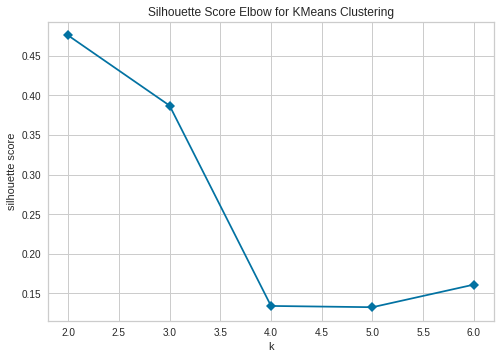

In [21]:
get_elbow(kart_grouped,'name',7)





.


next we see the dataset with the label attached to each location

In [22]:
X=kart_grouped.drop('name',1)
model=KMeans(n_clusters=2,random_state=0).fit(X)
kart_ordered.insert(0,'label',model.labels_)
kart_ordered

,label,name,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue,11th most common venue,12th most common venue,13th most common venue,14th most common venue,15th most common venue,16th most common venue,17th most common venue,18th most common venue,19th most common venue,20th most common venue
0,1,Almond Gokart Perlavista,Café,Dessert Shop,Restaurant,Electronics Store,Gym,Bakery,Pizza Place,Fast Food Restaurant,Pool,Breakfast Spot,Steakhouse,Shopping Mall,Furniture / Home Store,Cosmetics Shop,Men's Store,Turkish Restaurant,Arcade,Diner,Mobile Phone Shop,Shoe Store
1,1,Beylerbeyi Go-Kart,Seafood Restaurant,Restaurant,Café,Turkish Restaurant,Soccer Field,Soccer Stadium,Bakery,Boat or Ferry,Scenic Lookout,Arcade,Road,Palace,Gym,Food Court,Breakfast Spot,Garden Center,Snack Place,Dessert Shop,Comfort Food Restaurant,Park
2,1,Cadde 26 ★ Tuning 2006,Café,Turkish Restaurant,Electronics Store,Breakfast Spot,Department Store,Furniture / Home Store,Gym,Mobile Phone Shop,Health Food Store,Cosmetics Shop,Big Box Store,Rental Car Location,Fish & Chips Shop,Performing Arts Venue,BBQ Joint,Business Service,Coffee Shop,Racetrack,Hookah Bar,Kebab Restaurant
3,1,Esatpaşa GARAGE,Park,Bakery,Soccer Stadium,Café,Arcade,Jewelry Store,Farmers Market,Forest,Shopping Mall,Pie Shop,Bistro,Concert Hall,Convenience Store,Restaurant,Pizza Place,Department Store,Steakhouse,Dessert Shop,Historic Site,Health & Beauty Service
4,0,Ferrari Racing Days - IstanbulPark,Trail,Racetrack,Racecourse,Sports Club,Stadium,Parking,Gym / Fitness Center,Cave,Donut Shop,Fish Taverna,Deli / Bodega,Department Store,Food Truck,Dessert Shop,Food Court,Food & Drink Shop,Diner,Flower Shop,Flea Market,Fish Market
5,1,Fevpark Dragos,Restaurant,BBQ Joint,Café,Harbor / Marina,Forest,Steakhouse,Grocery Store,Seafood Restaurant,Castle,Tennis Court,Sports Club,Track,Pool,Athletics & Sports,Rest Area,Breakfast Spot,Cruise,Moving Target,Flea Market,Fish Taverna
6,1,Go Kart,Café,Turkish Restaurant,Restaurant,Coffee Shop,Arcade,Gym / Fitness Center,Pizza Place,Clothing Store,Mobile Phone Shop,Department Store,Electronics Store,Kebab Restaurant,Diner,Breakfast Spot,Hookah Bar,Dessert Shop,Beer Garden,Cosmetics Shop,Bakery,Soup Place
7,1,Go Kart Küçükçekmece,Steakhouse,Diner,Turkish Restaurant,Seafood Restaurant,Café,Restaurant,Fish & Chips Shop,Italian Restaurant,Furniture / Home Store,Mobile Phone Shop,Department Store,Garden Center,Food Court,Burger Joint,Skate Park,Beach,English Restaurant,Pizza Place,Beer Garden,Soup Place
8,1,GoKart City,Coffee Shop,Dessert Shop,Gym,Bar,Italian Restaurant,Athletics & Sports,Gym / Fitness Center,Salon / Barbershop,Restaurant,Bookstore,Buffet,Garden,Soup Place,Meyhane,Breakfast Spot,Convenience Store,Hookah Bar,Middle Eastern Restaurant,Burger Joint,Racetrack
9,1,Gokart Starcity,Café,Clothing Store,Coffee Shop,Turkish Restaurant,Restaurant,Hotel,Playground,Steakhouse,Furniture / Home Store,Dessert Shop,Lingerie Store,Park,Donut Shop,Soup Place,Social Club,Flower Shop,Nightclub,Burger Joint,Shopping Mall,Hotel Bar






.


for all the location, we get the frequency of each venue in the most common 20

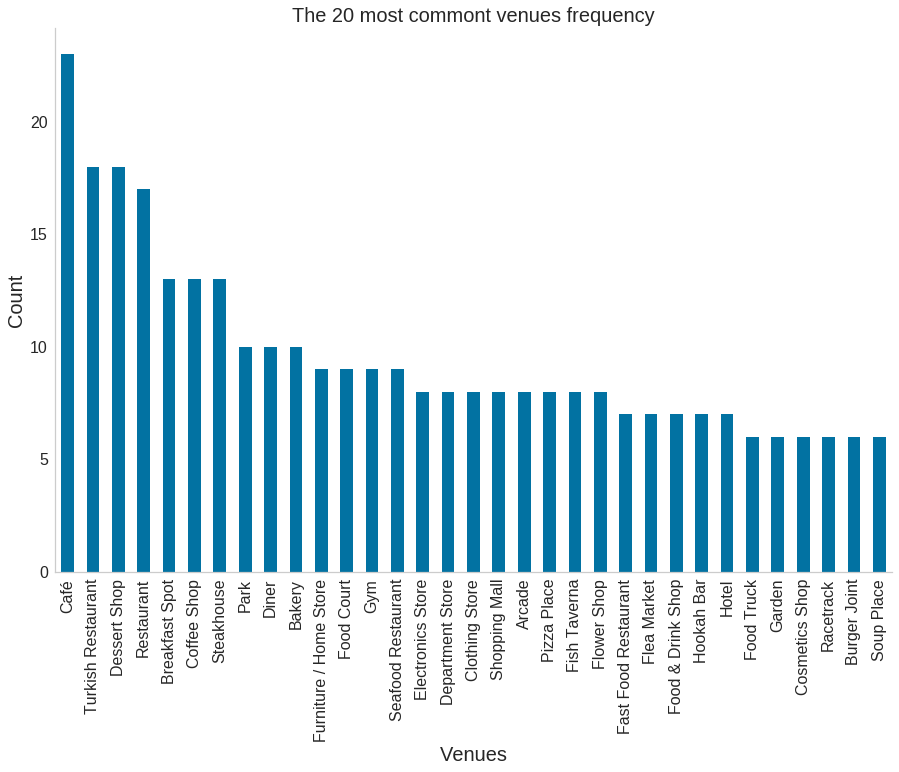

In [23]:
t=kart_ordered.iloc[:,2:].apply(pd.value_counts).sum(axis=1)
t=t.sort_values(ascending=False)


ax=t[t>5].plot(kind='bar',figsize=(15,10),grid=False,fontsize=16)

ax.set_xlabel('Venues',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_title('The 20 most commont venues frequency',fontsize=20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

From the figure it can be seen that the charactaristics of these locations are : cafe, fast/small/local food, shops, gyms, clubs/bars and outdoor/open places. It may be the case that these venues comes after the track is build, but because of the prescense of shoping mall, I think that the track comes with these venues not the other way around. 

only 2 tracks are standalone tracks, most of these locations are around aracde and different shops, which indicates that the tracks are part of going-out with the family experince or a go-out to have fun while shoping or doing other activites.

Hence, for Cairo we are intrested in places where there are venues where familes/friends could have fun driving the go karts, but also doing other activties like shoping or playing different games. 





.

### Cairo

In this section we will do the same with Cairo locations, first do the one hot encoding
then apply elbow method to find the number of clusters

making the onehot encoding of Cairo locations

In [24]:
cairo_onehot=pd.get_dummies(cairo_venues[['Venue Category']], prefix="", prefix_sep="")

cairo_onehot['Neighborhood']=cairo_venues['Neighborhood']

col=list(cairo_onehot.columns)
col.remove('Neighborhood')

cairo_onehot=cairo_onehot[['Neighborhood']+col]

cairo_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Big Box Store,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Buffet,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Candy Store,...,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shawarma Place,Shipping Store,Shopping Mall,Ski Area,Smoke Shop,Soccer Field,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Track,Trail,Tunnel,Turkish Restaurant,Used Bookstore,Waterfront,Women's Store,Yemeni Restaurant,Yoga Studio
0,Ad-Duqi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Ad-Duqi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ad-Duqi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ad-Duqi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ad-Duqi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Finding the frequency of each venue regarding the neighborhood

In [25]:
cairo_grouped=cairo_onehot.groupby('Neighborhood').mean().reset_index()
cairo_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Big Box Store,Bistro,Boat Rental,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Buffet,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Candy Store,...,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shawarma Place,Shipping Store,Shopping Mall,Ski Area,Smoke Shop,Soccer Field,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Track,Trail,Tunnel,Turkish Restaurant,Used Bookstore,Waterfront,Women's Store,Yemeni Restaurant,Yoga Studio
0,'Abdin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.03,0.01000,0.01,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.01,0.0,0.00,0.02,0.0,0.01,0.0,0.0,0.02000,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.190000,0.0,...,0.00,0.00,0.020000,0.00,0.00,0.01,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.05000,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0
1,'Ain Schams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00000,0.00,0.0,0.0,0.166667,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.333333,0.0,...,0.00,0.00,0.166667,0.00,0.00,0.00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2,Ad-Darb al-Ahmar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.02381,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.02381,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.190476,0.0,...,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.02381,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.02381,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
3,Ad-Duqi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.01,0.01,0.0,0.00,0.0,0.01,0.00,0.0,0.00,0.0,0.0,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.170000,0.0,...,0.01,0.01,0.020000,0.02,0.01,0.00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.00,0.03,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0
4,Al-'Ajuzah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00000,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.02,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.01000,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.0,0.300000,0.0,...,0.02,0.00,0.030000,0.00,0.00,0.00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.03,0.02,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


applying the elbow method, we find out that the number of clusters is 7

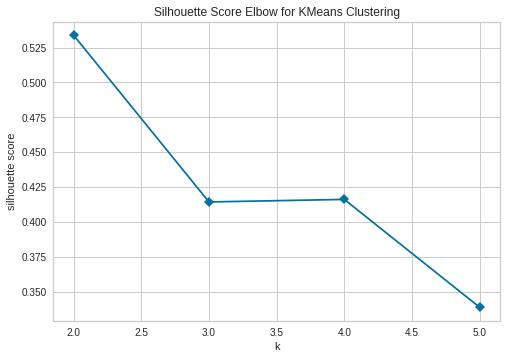

In [26]:
get_elbow(cairo_grouped,'Neighborhood',6)

Finding the 20 most common venues for each location

In [0]:
cairo_ordered=get_top_common('Neighborhood',20,cairo_grouped)

Applying the clusting of the neighborhoods and finding the labels

In [28]:
X=cairo_grouped.drop('Neighborhood',1)
model=KMeans(n_clusters=7,random_state=0)
model.fit(X)
model.labels_

array([4, 6, 4, 4, 6, 4, 4, 4, 4, 2, 4, 6, 4, 6, 6, 4, 4, 5, 4, 4, 4, 4,
       4, 6, 3, 4, 6, 4, 4, 4, 4, 4, 4, 6, 4, 1, 4, 4, 4, 0, 4, 4, 4, 0,
       6, 6, 0, 4, 6], dtype=int32)

showing the labeled neighborhoods with their labels 

In [29]:
g=cairo_ordered.copy()
g.insert(0,'label',model.labels_)
g

,label,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue,11th most common venue,12th most common venue,13th most common venue,14th most common venue,15th most common venue,16th most common venue,17th most common venue,18th most common venue,19th most common venue,20th most common venue
0,4,'Abdin,Café,Egyptian Restaurant,Plaza,Theater,Coffee Shop,Dessert Shop,Middle Eastern Restaurant,Pastry Shop,Hotel Bar,Art Gallery,Falafel Restaurant,Italian Restaurant,Bookstore,Seafood Restaurant,Hotel,Beer Garden,Fast Food Restaurant,Casino,Clothing Store,Kebab Restaurant
1,6,'Ain Schams,Café,Seafood Restaurant,Egyptian Restaurant,Auto Garage,Mobile Phone Shop,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Fair,Eye Doctor,Event Service,Electronics Store,Eastern European Restaurant,Duty-free Shop,Donut Shop,Doner Restaurant,Distribution Center,Diner,Dessert Shop,Deli / Bodega
2,4,Ad-Darb al-Ahmar,Café,Historic Site,Kebab Restaurant,Plaza,Egyptian Restaurant,Dessert Shop,Music Venue,Jewelry Store,Market,Mosque,Middle Eastern Restaurant,Coffee Shop,Falafel Restaurant,Theater,Concert Hall,Souvenir Shop,Park,Pie Shop,Hookah Bar,Bookstore
3,4,Ad-Duqi,Café,Restaurant,Fast Food Restaurant,Coffee Shop,Juice Bar,Gym / Fitness Center,Italian Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Plaza,Supermarket,Hotel,Electronics Store,Shawarma Place,Seafood Restaurant,Recording Studio,Organic Grocery,Hotel Bar,Yemeni Restaurant,Fried Chicken Joint
4,6,Al-'Ajuzah,Café,Restaurant,Coffee Shop,Fast Food Restaurant,Kebab Restaurant,Nightclub,Seafood Restaurant,Supermarket,Middle Eastern Restaurant,Egyptian Restaurant,Italian Restaurant,Bakery,Burger Joint,Sushi Restaurant,Salon / Barbershop,Lebanese Restaurant,Mobile Phone Shop,Hotel,Plaza,Dessert Shop
5,4,Al-'Umraniyah,Electronics Store,Hotel,Food & Drink Shop,History Museum,Doner Restaurant,Falafel Restaurant,Fair,Eye Doctor,Event Service,Hookah Bar,Egyptian Restaurant,Eastern European Restaurant,Duty-free Shop,Donut Shop,Distribution Center,Historic Site,Diner,Dessert Shop,Deli / Bodega,Dairy Store
6,4,Al-Ahram,Historic Site,Hotel,Hostel,Lounge,Kebab Restaurant,Gift Shop,Garden,Resort,Café,Seafood Restaurant,Souvenir Shop,Bed & Breakfast,Stables,Fried Chicken Joint,Perfume Shop,Amphitheater,History Museum,Gaming Cafe,Electronics Store,Egyptian Restaurant
7,4,Al-Azbakiyah,Café,Theater,Plaza,Movie Theater,Hotel,Falafel Restaurant,Clothing Store,Tunnel,Egyptian Restaurant,Pastry Shop,Bookstore,Market,Mobile Phone Shop,Distribution Center,Boutique,Middle Eastern Restaurant,Fast Food Restaurant,Juice Bar,Bakery,Italian Restaurant
8,4,Al-Basatin,Bakery,Dessert Shop,Convenience Store,Middle Eastern Restaurant,Gym / Fitness Center,Breakfast Spot,Donut Shop,Flower Shop,Pharmacy,Juice Bar,Burger Joint,Sandwich Place,Café,Mobile Phone Shop,Grocery Store,Smoke Shop,Chinese Restaurant,Market,Sporting Goods Shop,Racetrack
9,2,Al-Hawamidiyah,Print Shop,Fair,Flea Market,Falafel Restaurant,Eye Doctor,Event Service,Electronics Store,Egyptian Restaurant,Eastern European Restaurant,Duty-free Shop,Donut Shop,Doner Restaurant,Distribution Center,Diner,Dessert Shop,Deli / Bodega,Dairy Store,Currency Exchange,Cupcake Shop,Cuban Restaurant


In [30]:
g[g['label']==4]

,label,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue,11th most common venue,12th most common venue,13th most common venue,14th most common venue,15th most common venue,16th most common venue,17th most common venue,18th most common venue,19th most common venue,20th most common venue
0,4,'Abdin,Café,Egyptian Restaurant,Plaza,Theater,Coffee Shop,Dessert Shop,Middle Eastern Restaurant,Pastry Shop,Hotel Bar,Art Gallery,Falafel Restaurant,Italian Restaurant,Bookstore,Seafood Restaurant,Hotel,Beer Garden,Fast Food Restaurant,Casino,Clothing Store,Kebab Restaurant
2,4,Ad-Darb al-Ahmar,Café,Historic Site,Kebab Restaurant,Plaza,Egyptian Restaurant,Dessert Shop,Music Venue,Jewelry Store,Market,Mosque,Middle Eastern Restaurant,Coffee Shop,Falafel Restaurant,Theater,Concert Hall,Souvenir Shop,Park,Pie Shop,Hookah Bar,Bookstore
3,4,Ad-Duqi,Café,Restaurant,Fast Food Restaurant,Coffee Shop,Juice Bar,Gym / Fitness Center,Italian Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Plaza,Supermarket,Hotel,Electronics Store,Shawarma Place,Seafood Restaurant,Recording Studio,Organic Grocery,Hotel Bar,Yemeni Restaurant,Fried Chicken Joint
5,4,Al-'Umraniyah,Electronics Store,Hotel,Food & Drink Shop,History Museum,Doner Restaurant,Falafel Restaurant,Fair,Eye Doctor,Event Service,Hookah Bar,Egyptian Restaurant,Eastern European Restaurant,Duty-free Shop,Donut Shop,Distribution Center,Historic Site,Diner,Dessert Shop,Deli / Bodega,Dairy Store
6,4,Al-Ahram,Historic Site,Hotel,Hostel,Lounge,Kebab Restaurant,Gift Shop,Garden,Resort,Café,Seafood Restaurant,Souvenir Shop,Bed & Breakfast,Stables,Fried Chicken Joint,Perfume Shop,Amphitheater,History Museum,Gaming Cafe,Electronics Store,Egyptian Restaurant
7,4,Al-Azbakiyah,Café,Theater,Plaza,Movie Theater,Hotel,Falafel Restaurant,Clothing Store,Tunnel,Egyptian Restaurant,Pastry Shop,Bookstore,Market,Mobile Phone Shop,Distribution Center,Boutique,Middle Eastern Restaurant,Fast Food Restaurant,Juice Bar,Bakery,Italian Restaurant
8,4,Al-Basatin,Bakery,Dessert Shop,Convenience Store,Middle Eastern Restaurant,Gym / Fitness Center,Breakfast Spot,Donut Shop,Flower Shop,Pharmacy,Juice Bar,Burger Joint,Sandwich Place,Café,Mobile Phone Shop,Grocery Store,Smoke Shop,Chinese Restaurant,Market,Sporting Goods Shop,Racetrack
10,4,Al-Jamaliyah,Café,Historic Site,Mosque,Egyptian Restaurant,Sandwich Place,Pie Shop,Kebab Restaurant,Music Venue,Falafel Restaurant,Arts & Entertainment,Market,Souvenir Shop,Bus Station,Sports Club,Coffee Shop,Dessert Shop,Plaza,Theater,Women's Store,Hookah Bar
12,4,Al-Ma'adi,Café,Coffee Shop,Ice Cream Shop,Restaurant,American Restaurant,Convenience Store,Lounge,Middle Eastern Restaurant,Bookstore,Dessert Shop,Fast Food Restaurant,Mobile Phone Shop,Pizza Place,Indian Restaurant,Italian Restaurant,Cupcake Shop,Supermarket,Lebanese Restaurant,Burger Joint,Eye Doctor
15,4,Al-Muski,Café,Historic Site,Theater,Middle Eastern Restaurant,Falafel Restaurant,Market,Pie Shop,Egyptian Restaurant,Plaza,Tea Room,Italian Restaurant,Fried Chicken Joint,Clothing Store,Music Venue,Arts & Entertainment,Mobile Phone Shop,Art Museum,Bar,Antique Shop,Hotel


In [33]:
g.loc[[3,8,12,25,28,36,38,40]]

,label,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue,11th most common venue,12th most common venue,13th most common venue,14th most common venue,15th most common venue,16th most common venue,17th most common venue,18th most common venue,19th most common venue,20th most common venue
3,4,Ad-Duqi,Café,Restaurant,Fast Food Restaurant,Coffee Shop,Juice Bar,Gym / Fitness Center,Italian Restaurant,Mobile Phone Shop,Middle Eastern Restaurant,Plaza,Supermarket,Hotel,Electronics Store,Shawarma Place,Seafood Restaurant,Recording Studio,Organic Grocery,Hotel Bar,Yemeni Restaurant,Fried Chicken Joint
8,4,Al-Basatin,Bakery,Dessert Shop,Convenience Store,Middle Eastern Restaurant,Gym / Fitness Center,Breakfast Spot,Donut Shop,Flower Shop,Pharmacy,Juice Bar,Burger Joint,Sandwich Place,Café,Mobile Phone Shop,Grocery Store,Smoke Shop,Chinese Restaurant,Market,Sporting Goods Shop,Racetrack
12,4,Al-Ma'adi,Café,Coffee Shop,Ice Cream Shop,Restaurant,American Restaurant,Convenience Store,Lounge,Middle Eastern Restaurant,Bookstore,Dessert Shop,Fast Food Restaurant,Mobile Phone Shop,Pizza Place,Indian Restaurant,Italian Restaurant,Cupcake Shop,Supermarket,Lebanese Restaurant,Burger Joint,Eye Doctor
25,4,Az-Zahir,Café,Plaza,Juice Bar,Pizza Place,Chinese Restaurant,Supermarket,Fried Chicken Joint,Kebab Restaurant,Metro Station,Fast Food Restaurant,Falafel Restaurant,Mosque,Coffee Shop,History Museum,Asian Restaurant,Currency Exchange,Flower Shop,Flea Market,Airport Terminal,American Restaurant
28,4,Bulaq,Hotel,Bar,Café,Coffee Shop,Pub,Middle Eastern Restaurant,Lounge,Boat or Ferry,Burger Joint,Japanese Restaurant,Italian Restaurant,Steakhouse,Bookstore,Ice Cream Shop,Kebab Restaurant,Bus Station,Salad Place,Road,Lebanese Restaurant,Boutique
36,4,Nasr City 1,Café,Juice Bar,Indonesian Restaurant,Falafel Restaurant,Coffee Shop,Fried Chicken Joint,Supermarket,Baby Store,Syrian Restaurant,Pizza Place,Mobile Phone Shop,Gym,Creperie,Fair,Eye Doctor,Event Service,Electronics Store,Egyptian Restaurant,Eastern European Restaurant,Duty-free Shop
38,4,New Cairo 1,Coffee Shop,Café,Supermarket,Plaza,Ice Cream Shop,Falafel Restaurant,Pharmacy,Pizza Place,Park,Restaurant,Spa,Lebanese Restaurant,Candy Store,Shopping Mall,Bookstore,Kebab Restaurant,Sports Club,Fast Food Restaurant,Chinese Restaurant,Pool
40,4,New Cairo 3,Café,Fast Food Restaurant,Supermarket,Syrian Restaurant,Pizza Place,Restaurant,Convenience Store,Falafel Restaurant,Stationery Store,Kebab Restaurant,Lebanese Restaurant,Seafood Restaurant,Electronics Store,Egyptian Restaurant,Sandwich Place,Dessert Shop,Dairy Store,Pastry Shop,Juice Bar,Coffee Shop
